In [2]:
!pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 12.3 MB/s eta 0:00:00


In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl  # Import the control module

# Define the universe of discourse for project funding
x_funding = np.arange(0, 101, 1)

# Define fuzzy variables
# Input variables
project_funding = ctrl.Antecedent(x_funding, 'project_funding')  # Use ctrl.Antecedent
project_staffing = ctrl.Antecedent(x_funding, 'project_staffing')  # Use ctrl.Antecedent

# Output variable
project_risk = ctrl.Consequent(np.arange(0, 101, 10), 'project_risk')  # Use ctrl.Consequent

# Define membership functions for project_funding
project_funding['A1:inadequate'] = fuzz.trapmf(project_funding.universe, [0, 0, 20,30])
project_funding['A2:marginal'] = fuzz.trimf(project_funding.universe, [20, 50, 80])
project_funding['A3:adequate'] = fuzz.trapmf(project_funding.universe, [60, 80, 100,100])




In [4]:
# Define membership functions for project_staffing
project_staffing['B1:small'] = fuzz.trapmf(project_staffing.universe, [0, 0, 30, 60])
project_staffing['B2:large'] = fuzz.trapmf(project_staffing.universe, [40, 60, 100, 100])

# Define membership functions for project_risk
project_risk['C1:low'] = fuzz.trapmf(project_risk.universe, [0, 0, 20, 40])
project_risk['C2:normal'] = fuzz.trimf(project_risk.universe, [20, 50, 80])
project_risk['C3:high'] = fuzz.trapmf(project_risk.universe, [60, 80, 100, 100])

# Define fuzzy rules
rule1 = ctrl.Rule(project_funding['A3:adequate'] | project_staffing['B1:small'], project_risk['C1:low'])
rule2 = ctrl.Rule(project_funding['A2:marginal'] & project_staffing['B2:large'], project_risk['C2:normal'])
rule3 = ctrl.Rule(project_funding['A1:inadequate'], project_risk['C3:high'])

# Create control system and simulation
project_risk_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
project_risk_sim = ctrl.ControlSystemSimulation(project_risk_ctrl)


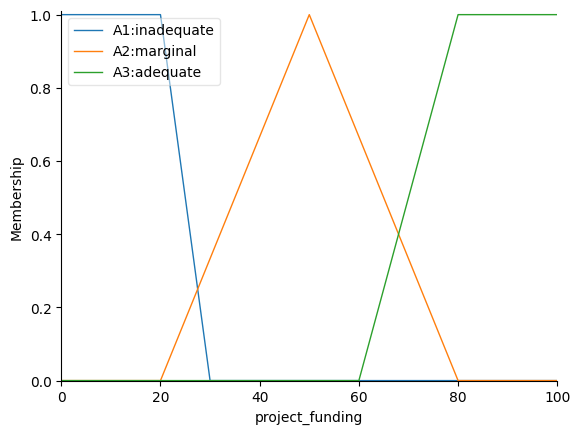

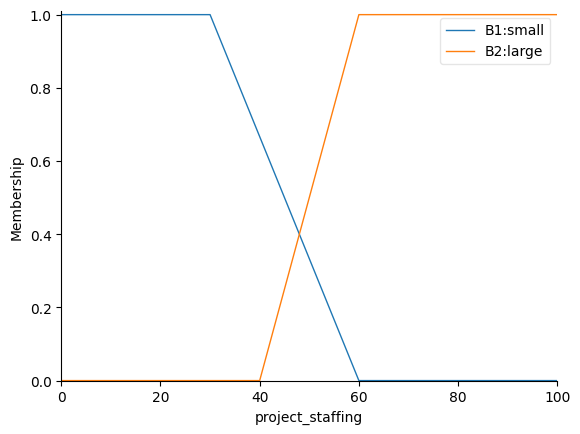

In [5]:
project_funding.view()

project_staffing.view()

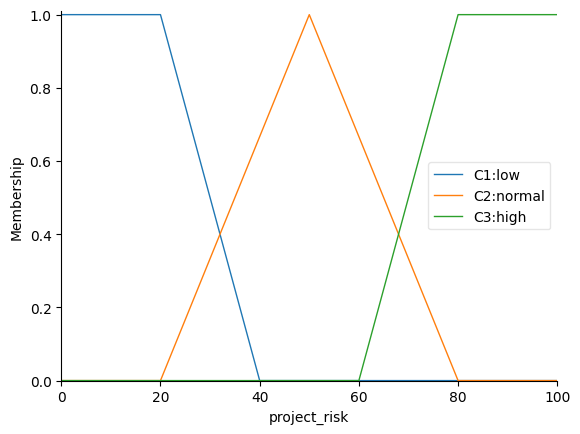

In [6]:
project_risk.view()

In [7]:
project_funding_rate=26
project_staffing_rate=54
project_risk_sim.input['project_funding'] = project_funding_rate
project_risk_sim.input['project_staffing'] = project_staffing_rate
# Crunch the numbers
project_risk_sim.compute()

In [8]:

# Calculate membership values for each membership function
inadequate_value = fuzz.interp_membership(x_funding, project_funding['A1:inadequate'].mf, project_funding_rate)
marginal_value = fuzz.interp_membership(x_funding, project_funding['A2:marginal'].mf, project_funding_rate)
adequate_value = fuzz.interp_membership(x_funding, project_funding['A3:adequate'].mf, project_funding_rate)

# Print the membership values
print(f"Membership value for 'inadequate' at {project_funding_rate}: {inadequate_value}")
print(f"Membership value for 'marginal' at {project_funding_rate}: {marginal_value}")
print(f"Membership value for 'adequate' at {project_funding_rate}: {adequate_value}")


Membership value for 'inadequate' at 26: 0.4
Membership value for 'marginal' at 26: 0.2
Membership value for 'adequate' at 26: 0.0


In [9]:
# Calculate membership values for each membership function
small_value = fuzz.interp_membership(x_funding, project_staffing['B1:small'].mf, project_staffing_rate)
large_value = fuzz.interp_membership(x_funding, project_staffing['B2:large'].mf, project_staffing_rate)

# Print the membership values
print(f"Membership value for 'small' at {project_staffing_rate}: {small_value}")
print(f"Membership value for 'large' at {project_staffing_rate}: {large_value}")


Membership value for 'small' at 54: 0.2
Membership value for 'large' at 54: 0.7


58.45098039215686


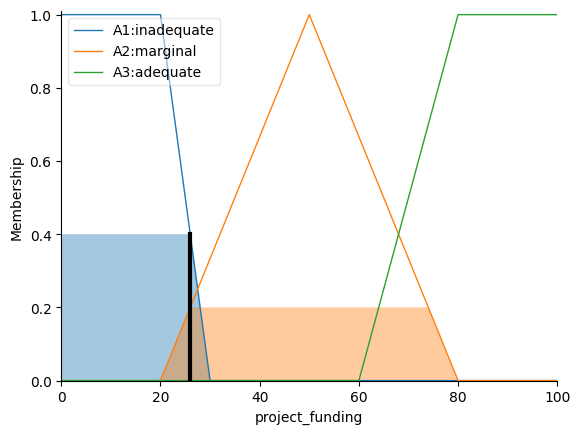

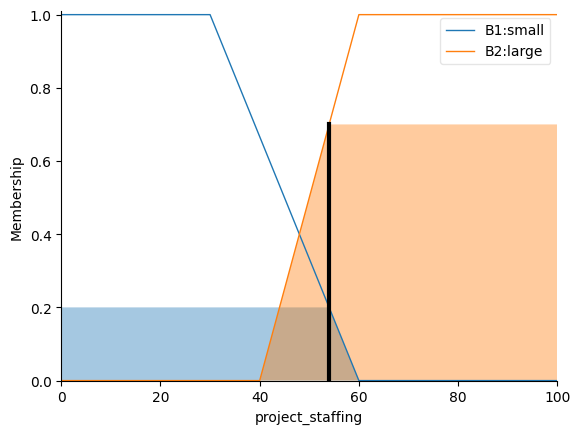

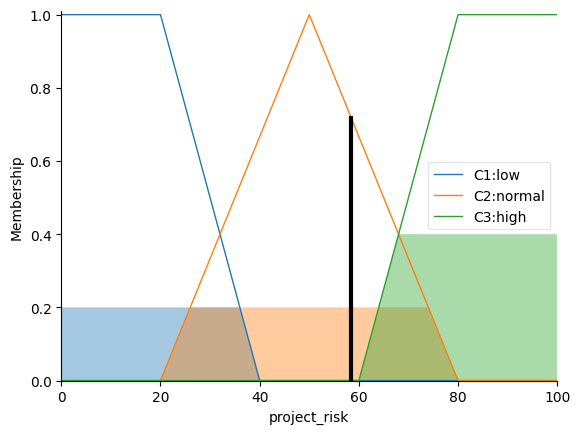

In [10]:
print(project_risk_sim.output['project_risk'])
project_funding.view(project_risk_sim)
project_staffing.view(project_risk_sim)
project_risk.view(sim=project_risk_sim)



In [11]:
from mpl_toolkits.mplot3d import Axes3D

# Function to plot 3D surface
def plot_3d_surface():
    funding_range = np.arange(0, 101, 1)
    staffing_range = np.arange(0, 101, 1)
    funding, staffing = np.meshgrid(funding_range, staffing_range)
    risk_output = np.zeros_like(funding)

    for i in range(funding.shape[0]):
        for j in range(funding.shape[1]):
            project_risk_sim.input['project_funding'] = funding[i, j]
            project_risk_sim.input['project_staffing'] = staffing[i, j]
            project_risk_sim.compute()
            risk_output[i, j] = project_risk_sim.output['project_risk']

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(funding, staffing, risk_output, cmap='coolwarm')
    ax.set_xlabel('Project Funding')
    ax.set_ylabel('Project Staffing')
    ax.set_zlabel('Project Risk')
    ax.set_title('Fuzzy Logic System: Project Risk')
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()



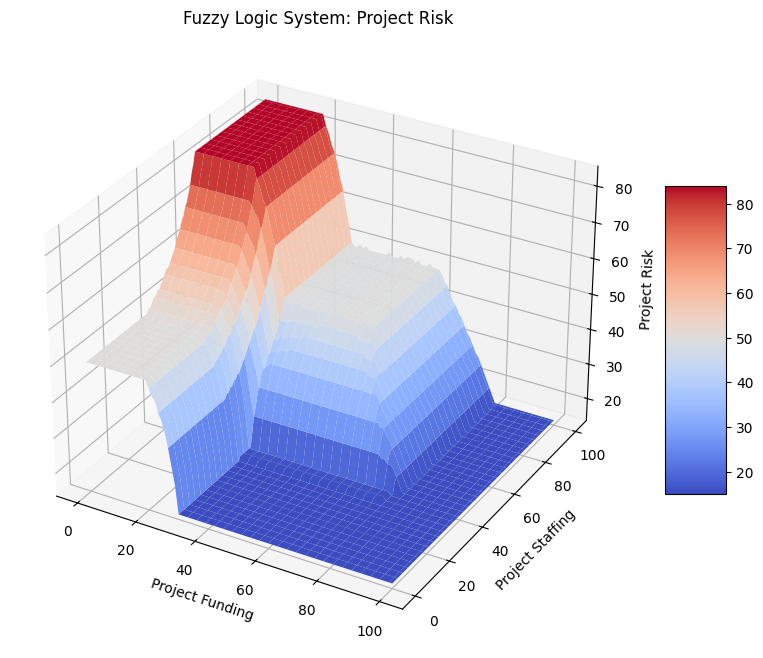

In [12]:
# Run the full simulation and plotting
#plot_memberships()
plot_3d_surface()


In [13]:
# Another code writing method for writing Fuzzy expert system

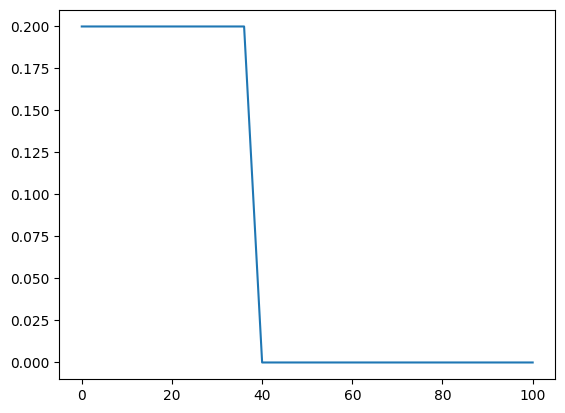

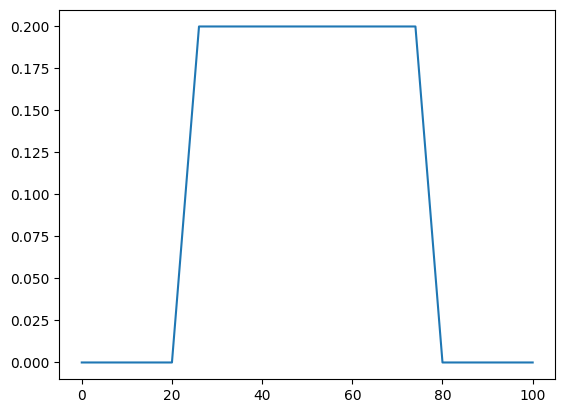

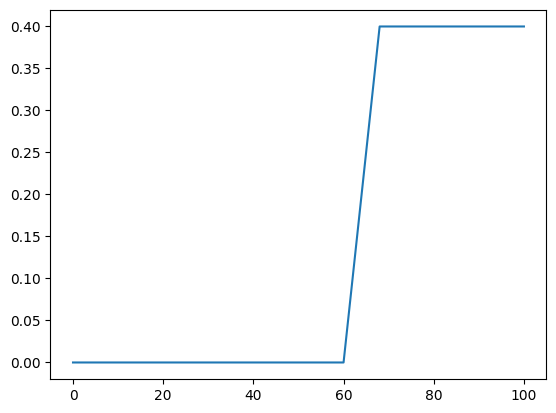

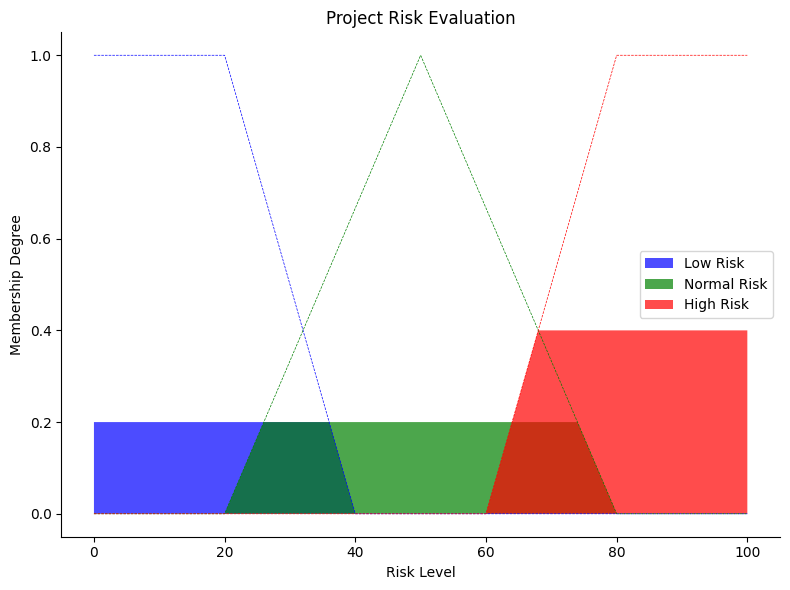

In [14]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl  # Import the control module

# Define the universe of discourse for project funding
x_funding = np.arange(0, 101, 1)
x_staffing = np.arange(0, 101, 1)
x_risk = np.arange(0, 101, 1)

# Define fuzzy variables
# Input variables
project_funding = ctrl.Antecedent(x_funding, 'project_funding')  # Use ctrl.Antecedent
project_staffing = ctrl.Antecedent(x_staffing, 'project_staffing')  # Use ctrl.Antecedent

# Output variable
project_risk = ctrl.Consequent(x_risk, 'project_risk')  # Use ctrl.Consequent

# Define membership functions for project_funding
project_funding['inadequate'] = fuzz.trapmf(project_funding.universe, [0, 0, 20, 30])
project_funding['marginal'] = fuzz.trimf(project_funding.universe, [20, 50, 80])
project_funding['adequate'] = fuzz.trapmf(project_funding.universe, [60, 80, 100, 100])

# Define membership functions for project_staffing
project_staffing['small'] = fuzz.trapmf(project_staffing.universe, [0, 0, 30, 60])
project_staffing['large'] = fuzz.trapmf(project_staffing.universe, [40, 60, 100, 100])

# Define membership functions for project_risk
project_risk['low'] = fuzz.trapmf(project_risk.universe, [0, 0, 20, 40])
project_risk['normal'] = fuzz.trimf(project_risk.universe, [20, 50, 80])
project_risk['high'] = fuzz.trapmf(project_risk.universe, [60, 80, 100, 100])

# Define fuzzy rules
rule1 = ctrl.Rule(project_funding['adequate'] | project_staffing['small'], project_risk['low'])
rule2 = ctrl.Rule(project_funding['marginal'] & project_staffing['large'], project_risk['normal'])
rule3 = ctrl.Rule(project_funding['inadequate'], project_risk['high'])

# Create control system and simulation
project_risk_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
project_risk_sim = ctrl.ControlSystemSimulation(project_risk_ctrl)

# Input values
project_funding_rate = 26
project_staffing_rate = 54

project_risk_sim.input['project_funding'] = project_funding_rate
project_risk_sim.input['project_staffing'] = project_staffing_rate

# Crunch the numbers
project_risk_sim.compute()

# Get membership activations
funding_inadequate = fuzz.interp_membership(x_funding, project_funding['inadequate'].mf, project_funding_rate)
funding_marginal = fuzz.interp_membership(x_funding, project_funding['marginal'].mf, project_funding_rate)
funding_adequate = fuzz.interp_membership(x_funding, project_funding['adequate'].mf, project_funding_rate)

staffing_small = fuzz.interp_membership(x_staffing, project_staffing['small'].mf, project_staffing_rate)
staffing_large = fuzz.interp_membership(x_staffing, project_staffing['large'].mf, project_staffing_rate)

# Apply rules
rule1_activation = np.fmax(funding_adequate, staffing_small)
rule2_activation = np.fmin(funding_marginal, staffing_large)
rule3_activation = funding_inadequate

# Clip the output membership functions
risk_activation_low = np.fmin(rule1_activation, project_risk['low'].mf)
risk_activation_normal = np.fmin(rule2_activation, project_risk['normal'].mf)
risk_activation_high = np.fmin(rule3_activation, project_risk['high'].mf)

plt.plot (x_staffing,risk_activation_low)
plt.show()
plt.plot (x_staffing,risk_activation_normal)
plt.show()

plt.plot (x_staffing,risk_activation_high)
plt.show()


# Visualize the output membership functions
# Aggregate the output membership functions
aggregated = np.fmax(risk_activation_low, np.fmax(risk_activation_normal, risk_activation_high))

# Defuzzify
risk_defuzzified = fuzz.defuzz(x_risk, aggregated, 'centroid')

# Visualize the result
fig, ax = plt.subplots(figsize=(8, 6))

ax.fill_between(x_risk, np.zeros_like(x_risk), risk_activation_low, facecolor='b', alpha=0.7, label="Low Risk")
ax.plot(x_risk, project_risk['low'].mf, 'b--', linewidth=0.5)

ax.fill_between(x_risk, np.zeros_like(x_risk), risk_activation_normal, facecolor='g', alpha=0.7, label="Normal Risk")
ax.plot(x_risk, project_risk['normal'].mf, 'g--', linewidth=0.5)

ax.fill_between(x_risk, np.zeros_like(x_risk), risk_activation_high, facecolor='r', alpha=0.7, label="High Risk")
ax.plot(x_risk, project_risk['high'].mf, 'r--', linewidth=0.5)

#ax.plot([risk_defuzzified, risk_defuzzified], [0, 1], 'k', linewidth=1.5, alpha=0.9, label=f"Defuzzified Risk: {risk_defuzzified:.2f}")

plt.title("Project Risk Evaluation")
plt.xlabel("Risk Level")
plt.ylabel("Membership Degree")
plt.legend()
# Turn off top/right axes
for ax in (ax,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()



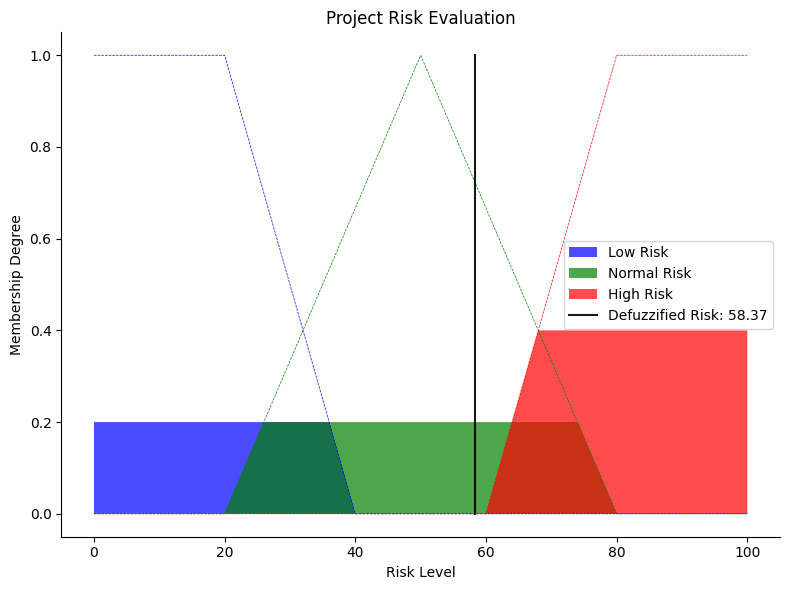

In [15]:
# Visualize the final result
fig, ax = plt.subplots(figsize=(8, 6))

ax.fill_between(x_risk, np.zeros_like(x_risk), risk_activation_low, facecolor='b', alpha=0.7, label="Low Risk")
ax.plot(x_risk, project_risk['low'].mf, 'b--', linewidth=0.5)

ax.fill_between(x_risk, np.zeros_like(x_risk), risk_activation_normal, facecolor='g', alpha=0.7, label="Normal Risk")
ax.plot(x_risk, project_risk['normal'].mf, 'g--', linewidth=0.5)

ax.fill_between(x_risk, np.zeros_like(x_risk), risk_activation_high, facecolor='r', alpha=0.7, label="High Risk")
ax.plot(x_risk, project_risk['high'].mf, 'r--', linewidth=0.5)

ax.plot([risk_defuzzified, risk_defuzzified], [0, 1], 'k', linewidth=1.5, alpha=0.9, label=f"Defuzzified Risk: {risk_defuzzified:.2f}")

plt.title("Project Risk Evaluation")
plt.xlabel("Risk Level")
plt.ylabel("Membership Degree")
plt.legend()
# Turn off top/right axes
for ax in (ax,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()
